<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://github.com/SkatAI/skatai_deeplearning/blob/master/notebooks/les_tenseurs.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Executer dans Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/SkatAI/skatai_deeplearning/blob/master/notebooks/les_tenseurs.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />sur GitHub</a>
  </td>
</table>

# Mulit Layer Perceptron avec scikit-learn

Dans ce notebook nous allons entrainer un modele de MLP de scikit-learn sur la base du dataset MNIST

- MLPClassifier : https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
- MNIST : http://yann.lecun.com/exdb/mnist/
- MNIST sur openml : https://www.openml.org/search?type=data&sort=runs&id=554&status=active

L'objectif est d'observer l'influence des paramtres et de l'architecture sur
- les performances du modele
- l'overfitting

Nous allons démarrer avec un model simple puis travailler sur
- le learning rate
- l'architecture : nombre de couches, nombre de noeuds
- les epochs
- la régularisation L2 et L1

In [1]:
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier


In [2]:
# charger le jeu de données

X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)



/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [6]:
# normalisation
X = X / 255.0


In [7]:
# Split data into train partition and test partition
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.7)


In [16]:
# definir le model avec 1 couche cachée et 40 noeud internes
# https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

mlp = MLPClassifier(
    hidden_layer_sizes=(40,),
    max_iter=200,
    alpha=1e-4,
    solver="sgd",
    verbose=10,
    random_state=1,
    learning_rate_init=0.2,
)


In [17]:
mlp.fit(X_train, y_train)



Iteration 1, loss = 2.30404856
Iteration 2, loss = 2.30196672
Iteration 3, loss = 2.29996799
Iteration 4, loss = 2.29772689
Iteration 5, loss = 2.28915693
Iteration 6, loss = 2.27309085
Iteration 7, loss = 2.24007857
Iteration 8, loss = 2.19456814
Iteration 9, loss = 2.17153347
Iteration 10, loss = 2.11944044
Iteration 11, loss = 2.09552835
Iteration 12, loss = 2.06383242
Iteration 13, loss = 2.08069500
Iteration 14, loss = 2.13079717
Iteration 15, loss = 2.11314121
Iteration 16, loss = 2.09831407
Iteration 17, loss = 2.09527196
Iteration 18, loss = 2.06291939
Iteration 19, loss = 2.03349537
Iteration 20, loss = 2.04984260
Iteration 21, loss = 2.00648061
Iteration 22, loss = 2.00672049
Iteration 23, loss = 1.98874862
Iteration 24, loss = 1.98751661
Iteration 25, loss = 1.98305433
Iteration 26, loss = 1.93024106
Iteration 27, loss = 1.95252711
Iteration 28, loss = 1.94492352
Iteration 29, loss = 1.92441790
Iteration 30, loss = 1.89696448
Iteration 31, loss = 1.92991637
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(40,), learning_rate_init=0.2, random_state=1,
              solver='sgd', verbose=10)

In [18]:
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))


Training set score: 0.363619
Test set score: 0.361490


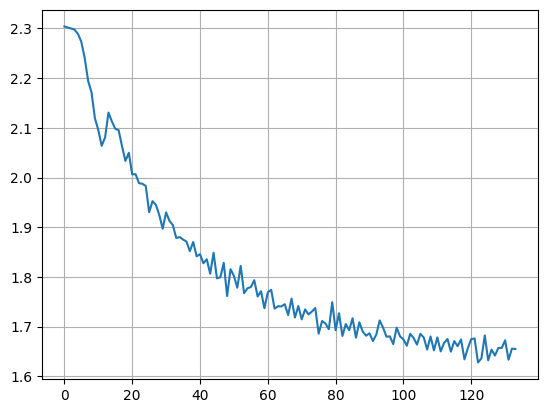

In [19]:
plt.plot(mlp.loss_curve_)
plt.grid()


# A vous

Qu'observe t on quand
- on augmente le nombre d'epoch (max_iter)
- on augmente la taille de la couche cachée
- on rajoute une autre couche de meme taille
- on ne garde qu'une couche mais de taille plus réduite

Creer de l'overfit avec un modele trop complexe :

- augmenter la taille et le nombre de couches
- reduire le learning rate
- mettre alpha à 0

Puis une fois que l'overfit apparaît essayer de le réduire en jouant avec
- le alpha (L2)
- le batch size

In [ ]:
# alpha = 0.8
mlp = MLPClassifier(
    hidden_layer_sizes=(40,),
    max_iter=100,
    alpha=1e-4,
    solver="sgd",
    verbose=10,
    random_state=1,
    learning_rate_init=0.01,
)
mlp.fit(X_train, y_train)
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))
plt.plot(mlp.loss_curve_)
plt.grid()


Iteration 1, loss = 2.30780210
Iteration 2, loss = 2.30162848
Iteration 3, loss = 2.30104210
Iteration 4, loss = 2.30085380
Iteration 5, loss = 2.30069354
Iteration 6, loss = 2.30055337
Iteration 7, loss = 2.30050565
Iteration 8, loss = 2.30038896
Iteration 9, loss = 2.30018830
Iteration 10, loss = 2.30005133
Iteration 11, loss = 2.29988377
Iteration 12, loss = 2.29972418
Iteration 13, loss = 2.29962498
Iteration 14, loss = 2.29944037
Iteration 15, loss = 2.29926284
Iteration 16, loss = 2.29912020
Iteration 17, loss = 2.29899957
Iteration 18, loss = 2.29880165
Iteration 19, loss = 2.29863205
Iteration 20, loss = 2.29847534
Iteration 21, loss = 2.29828760
Iteration 22, loss = 2.29812951
Iteration 23, loss = 2.29789228
Iteration 24, loss = 2.29771293
Iteration 25, loss = 2.29753578
Iteration 26, loss = 2.29734675
Iteration 27, loss = 2.29701234
Iteration 28, loss = 2.29688205
Iteration 29, loss = 2.29662028
Iteration 30, loss = 2.29648171
Iteration 31, loss = 2.29625994
Iteration 32, los

# Voir les coefficients de la couche interne

In [ ]:
fig, axes = plt.subplots(4, 4)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=0.5 * vmin, vmax=0.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()